In [2]:
import pandas as pd

In [3]:
weather=pd.read_csv('local_weather.csv',index_col='DATE')

In [4]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [5]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

In [6]:
core_weather=weather[['PRCP','SNOW','SNWD','TMAX','TMIN']].copy()

In [7]:
core_weather.columns=['Precipitate','Snow','Snow_Depth','Temperature_Max','Temperature_Min']

In [8]:
core_weather.head()

,Precipitate,Snow,Snow_Depth,Temperature_Max,Temperature_Min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0


In [9]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

Precipitate        0.016668
Snow               0.324990
Snow_Depth         0.317634
Temperature_Max    0.000534
Temperature_Min    0.000593
dtype: float64

In [10]:
core_weather["Snow"].value_counts()

0.0    11379
1.0        1
Name: Snow, dtype: int64

In [11]:
del core_weather["Snow"]

In [12]:
core_weather['Snow_Depth'].value_counts()

0.0    11504
Name: Snow_Depth, dtype: int64

In [13]:
del core_weather['Snow_Depth']

In [14]:
core_weather[pd.isnull(core_weather['Precipitate'])]

,Precipitate,Temperature_Max,Temperature_Min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [15]:
core_weather.loc["1983-10-20":"1983-11-05",:]

,Precipitate,Temperature_Max,Temperature_Min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [16]:
core_weather["Precipitate"].value_counts()

0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: Precipitate, Length: 176, dtype: int64

In [17]:
core_weather["Precipitate"]=core_weather['Precipitate'].fillna(0)

In [18]:
core_weather[pd.isnull(core_weather["Temperature_Max"])]

,Precipitate,Temperature_Max,Temperature_Min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [19]:
core_weather=core_weather.fillna(method='ffill')

In [20]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

Precipitate        0.0
Temperature_Max    0.0
Temperature_Min    0.0
dtype: float64

In [21]:
core_weather.dtypes

Precipitate        float64
Temperature_Max    float64
Temperature_Min    float64
dtype: object

In [22]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [23]:
core_weather.index=pd.to_datetime(core_weather.index)

In [24]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [25]:
core_weather.apply(lambda x: (x==9999).sum())

Precipitate        0
Temperature_Max    0
Temperature_Min    0
dtype: int64

<Axes: xlabel='DATE'>

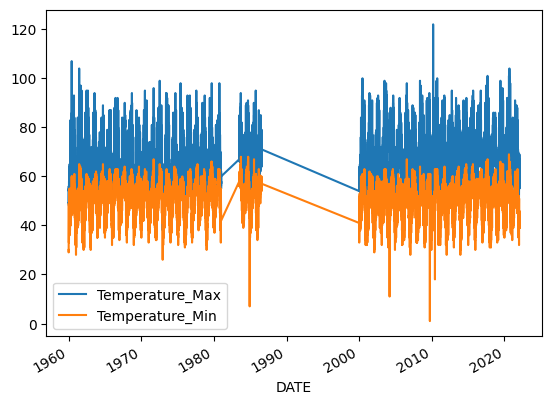

In [26]:
core_weather[['Temperature_Max','Temperature_Min']].plot()

In [27]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

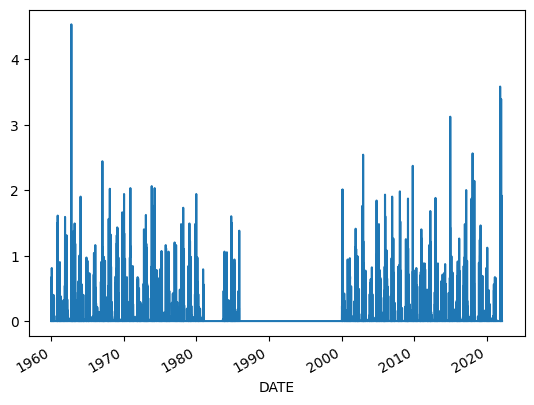

In [28]:
core_weather['Precipitate'].plot()

In [29]:
core_weather.groupby(core_weather.index.year).sum()['Precipitate']

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: Precipitate, dtype: float64

In [30]:
core_weather['target']=core_weather.shift(-1)['Temperature_Max']

In [31]:
core_weather

,Precipitate,Temperature_Max,Temperature_Min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [32]:
core_weather=core_weather.iloc[:-1,:].copy()

In [33]:
core_weather

,Precipitate,Temperature_Max,Temperature_Min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [34]:
from sklearn.linear_model import Ridge

reg= Ridge(alpha=.1)

In [35]:
predictors=['Precipitate','Temperature_Max','Temperature_Min']

In [36]:
train=core_weather.loc[:'2020-12-31']

In [37]:
test=core_weather['2021-01-01':]

In [38]:
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [39]:
predictions=reg.predict(test[predictors])

In [40]:
from sklearn.metrics import mean_absolute_error

In [41]:
mean_absolute_error(test["target"],predictions)

3.4111699434528306

In [42]:
combined=pd.concat([test['target'],pd.Series(predictions,index=test.index)],axis=1)
combined.columns=['Actuals','Predictions']

In [43]:
combined

,Actuals,Predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


<Axes: xlabel='DATE'>

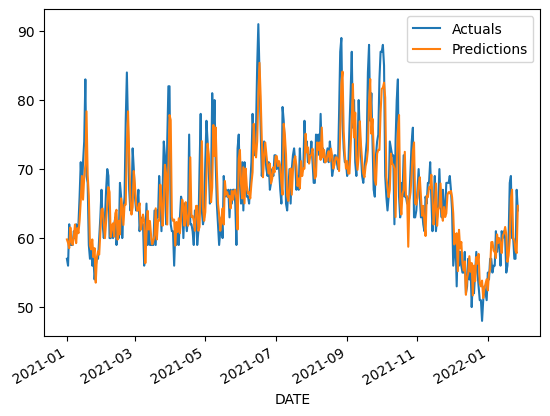

In [44]:
combined.plot()

In [45]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [46]:
def create_predictions(predictors, core_weather, reg):
    train=core_weather.loc[:'2020-12-31']
    test=core_weather['2021-01-01':]
    reg.fit(train[predictors],train["target"])
    predictions=reg.predict(test[predictors])
    error=mean_absolute_error(test["target"],predictions)
    combined=pd.concat([test['target'],pd.Series(predictions,index=test.index)],axis=1)
    combined.columns=['Actuals','Predictions']
    return error, combined

In [47]:
core_weather['Month_Max']=core_weather['Temperature_Max'].rolling(30).mean()

In [48]:
core_weather

,Precipitate,Temperature_Max,Temperature_Min,target,Month_Max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000
2022-01-24,0.0,60.0,39.0,57.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,57.200000


In [49]:
core_weather['Month_day_max']=core_weather['Month_Max']/core_weather['Temperature_Max']

In [50]:
core_weather['Max_Min']=core_weather["Temperature_Max"]/core_weather['Temperature_Min']

In [51]:
predictors=['Precipitate','Temperature_Max','Temperature_Min','Month_Max','Month_day_max','Max_Min']

In [52]:
core_weather=core_weather.iloc[30:,:].copy()

In [53]:
error, combined= create_predictions(predictors, core_weather, reg)

In [54]:
error

3.360129746207604

<Axes: xlabel='DATE'>

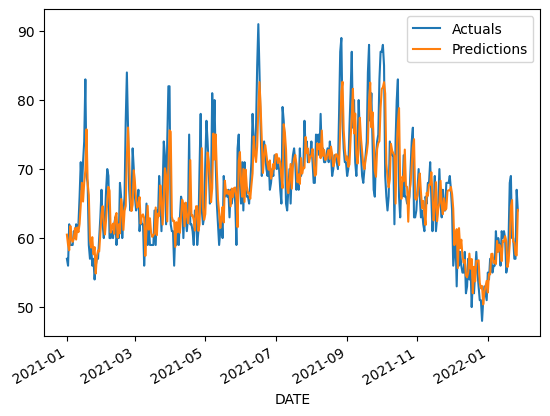

In [55]:
combined.plot()

In [56]:
core_weather["Monthly_Avg"]=core_weather["Temperature_Max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

C:\Users\aryan\AppData\Local\Temp\ipykernel_7904\1869633507.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  core_weather["Monthly_Avg"]=core_weather["Temperature_Max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())


In [57]:
core_weather

,Precipitate,Temperature_Max,Temperature_Min,target,Month_Max,Month_day_max,Max_Min,Monthly_Avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955


In [58]:
core_weather['Day_of_Year_Avg']=core_weather['Temperature_Max'].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

C:\Users\aryan\AppData\Local\Temp\ipykernel_7904\1024364708.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  core_weather['Day_of_Year_Avg']=core_weather['Temperature_Max'].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())


In [59]:
predictors=['Precipitate','Temperature_Max','Temperature_Min','Month_Max','Month_day_max','Max_Min','Day_of_Year_Avg','Monthly_Avg']

In [60]:
error, combined=create_predictions(predictors, core_weather, reg)

In [61]:
error

3.3176926587659956

In [62]:
reg.coef_

array([ -0.90804013,   0.40146278,   0.03114081,   0.33672074,
       -15.97061869,   0.0493612 ,   0.08006707,   0.14343362])

In [63]:
core_weather.corr()["target"]

Precipitate       -0.205413
Temperature_Max    0.821650
Temperature_Min    0.596016
target             1.000000
Month_Max          0.686842
Month_day_max     -0.421537
Max_Min            0.045228
Monthly_Avg        0.689805
Day_of_Year_Avg    0.712334
Name: target, dtype: float64

In [64]:
combined['Diff']=(combined['Actuals']-combined['Predictions']).abs()

In [65]:
combined.sort_values('Diff',ascending=False).head()

,Actuals,Predictions,Diff
DATE,,,
2021-01-17,83.0,68.585837,14.414163
2021-05-07,81.0,67.774432,13.225568
2021-04-01,62.0,75.178360,13.178360
2021-02-22,84.0,71.168844,12.831156
2021-10-16,66.0,78.823197,12.823197


In [66]:
combined

,Actuals,Predictions,Diff
DATE,,,
2021-01-01,57.0,59.565585,2.565585
2021-01-02,56.0,57.603636,1.603636
2021-01-03,62.0,56.966612,5.033388
2021-01-04,59.0,60.728732,1.728732
2021-01-05,59.0,58.896019,0.103981
...,...,...,...
2022-01-23,60.0,59.339216,0.660784
2022-01-24,57.0,59.301424,2.301424
2022-01-25,57.0,57.427889,0.427889
